# 問題1 - 6

In [1]:
import numpy as np
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Using TensorFlow backend.


In [2]:
print(X_train.shape) # (60000, 28, 28)
print(X_test.shape) # (10000, 28, 28)
print(X_train[0].dtype) # uint8
print(X_train[0].shape)
print(type(X_train))

(60000, 28, 28)
(10000, 28, 28)
uint8
(28, 28)
<class 'numpy.ndarray'>


In [3]:
X_train = X_train.reshape(-1,784)
X_test = X_test.reshape(-1,784)

In [4]:
X_train = X_train.astype(np.float)
X_test = X_test.astype(np.float)
X_train /= 255
X_test /= 255
print(X_train.max())
print(X_train.min())

1.0
0.0


In [5]:
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


Text(0.5, 1.0, 'label : 5')

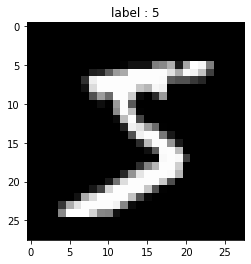

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
index = 0
image = X_train[index].reshape(28,28)
plt.imshow(image, 'gray')
plt.title('label : {}'.format(y_train[index]))

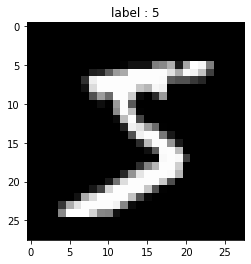

[[-105.35       -105.35       -105.35       -105.35       -105.35
  -105.35       -105.35       -105.35       -105.35       -105.35
  -105.35       -105.35       -105.35       -105.35       -105.35
  -105.35       -105.35       -105.35       -105.35       -105.35
  -105.35       -105.35       -105.35       -105.35       -105.35
  -105.35       -105.35       -105.35      ]
 [-105.35       -105.35       -105.35       -105.35       -105.35
  -105.35       -105.35       -105.35       -105.35       -105.35
  -105.35       -105.35       -105.35       -105.35       -105.35
  -105.35       -105.35       -105.35       -105.35       -105.35
  -105.35       -105.35       -105.35       -105.35       -105.35
  -105.35       -105.35       -105.35      ]
 [-105.35       -105.35       -105.35       -105.35       -105.35
  -105.35       -105.35       -105.35       -105.35       -105.35
  -105.35       -105.35       -105.35       -105.35       -105.35
  -105.35       -105.35       -105.35       -105.35 

In [7]:
import numpy as np
index = 0
image = X_train[index].reshape(28,28)
image = image.astype(np.float) # float型に変換
image -= 105.35 # 意図的に負の小数値を作り出してみる
plt.imshow(image, 'gray')
plt.title('label : {}'.format(y_train[index]))
plt.show()
print(image) # 値

In [10]:
class GetMiniBatch:
    def __init__(self, X, y, batch_size=20, seed=0):
        self.batch_size = batch_size
        np.random.seed(seed)
        shuffle_index = np.random.permutation(np.arange(X.shape[0]))
        self._X = X[shuffle_index]
        self._y = y[shuffle_index]
        self._stop = np.ceil(X.shape[0] / self.batch_size).astype(np.int)
        #self.stopは作成するバッチサイズ数。１エポック分作成する
        
        
    def __len__(self):
        return self._stop
    
    #指定したバッチ番号を取ってきてくれる
    def __getitem__(self, item):
        p0 = item * self.batch_size
        p1 = item*self.batch_size + self.batch_size
        return self._X[p0 : p1], self._y[p0 : p1]

    
    
    #batchカウンターを初期化する
    def __iter__(self):
        self._counter = 0
        return self
    
    #batchを前から一つずつ取ってくる
    def __next__(self):
        if self._counter >= self._stop:
            raise StopIteration()
        p0 = self._counter * self.batch_size
        p1 = self._counter * self.batch_size + self.batch_size
        self._counter += 1
        return self._X[p0 : p1], self._y[p0 : p1]
    

In [23]:
# from sklearn.preprocessing import OneHotEncoder
# enc = OneHotEncoder()
# y_train_one_hot = enc.fit_transform(y_train[:, np.newaxis])
from keras.utils.np_utils import to_categorical
y_train_one_hot = to_categorical(y_train, num_classes=10)
print(y_train.shape)
print(y_train_one_hot.shape) # (60000, 10)
print(y_train_one_hot.dtype) # float64
print(type(y_train_one_hot))

(60000,)
(60000, 10)
float32
<class 'numpy.ndarray'>


In [36]:
class ScratchSimpleNeuralNetrowkClassifier:
    """
    シンプルな三層ニューラルネットワーク分類器

    Parameters
    ----------

    Attributes
    ----------
    """

    def __init__(self, verbose = True):
        self.lr = 0.01
        self.loss_list = []
        self.epoch_loss_list = []
        self.verbose = verbose
        self.batch_size = 20
        self.n_features = 784
        self.n_nodes1 = 400
        self.n_nodes2 = 200
        self.n_output = 10
        self.sigma = 0.01
        self.W1 = np.random.randn(self.n_features,
                                               self.n_nodes1) / np.sqrt(self.n_features)
        self.W1_list = []
        #print('初期値W1:', self.W1)
        self.b1 = np.random.randn(self.n_nodes1,) / np.sqrt(self.n_features)
        self.W2 = self.sigma * np.random.randn(self.n_nodes1,
                                               self.n_nodes2) / np.sqrt(self.n_nodes1)
        self.W2_list = []
        #print('初期値W2:', self.W2)
        self.b2 = np.random.randn(self.n_nodes2,) / np.sqrt(self.n_nodes1)
        self.W3 = self.sigma * np.random.randn(self.n_nodes2, 
                                               self.n_output) / np.sqrt(self.n_nodes2)
        self.W3_list = []
        #print('初期値W3:', self.W3)
        self.b3 = np.random.randn(self.n_output,) / np.sqrt(self.n_nodes2)
        
        self.b1_list = []
        
        
        self.a1 = None
        self.z1 = None
        self.a2 = None
        self.z2 = None
        self.a3 = None
        self.z3 = None
        
        
        
        self.dW1 = np.zeros_like(self.W1)
        self.dW1_list = []
        self.epoch_dW1_list = []
        self.db1 = np.zeros_like(self.b1)
        self.dW2 = np.zeros_like(self.W2)
        self.db2 = np.zeros_like(self.b2)
        self.dW3 = np.zeros_like(self.W3)
        self.db3 = np.zeros_like(self.b3)
    

    def fit(self, X, y, X_val=None, y_val=None):
        print('====fit処理を実行します。====')
        
        self.epochs = 20
        
        for i in range(self.epochs):
            print('************' + str(i+1) + '回目エポック**************')
            
        
            get_mini_batch = GetMiniBatch(X, y, batch_size=20)
            count = 1
            for mini_X_train, mini_y_train in get_mini_batch:

                if self.verbose:
#                     print(mini_y_train.shape)

#                     print('mini_X_trainのタイプ：', type(mini_X_train))
#                     print('mini_y_trainのタイプ：', type(mini_y_train))
                #verboseをTrueにした際は学習過程などを出力する
#                     print('-------' + str(count) + '回目の処理----------')


#                     print('--------self.lossを実行します---------')
                    z3,loss = self.loss(mini_X_train, mini_y_train)
#                     print('-------self.lossの実行を終了します。中身;loss: {}, z3: {} --------------'.format(loss, z3[:5,:]))
#                     print('lossの形状：',loss.shape)
                    self.loss_list.append(loss)
#                     print('--------backward処理を実行します---------')
                    self.backward(mini_X_train, mini_y_train, self.z3)
#                     print('--------backward処理の実行を終了します---------')

#                     print('------パラメータの更新処理を実行します------')

                    self.W1 -= self.lr * self.dW1
                    self.b1 -= self.lr * self.db1
                    self.b1_list.append(self.b1)
                    self.W2 -= self.lr * self.dW2
                    self.b2 -= self.lr * self.db2
                    self.W3 -= self.lr * self.dW3
                    self.b3 -= self.lr * self.db3

#                     print('------パラメータの更新処理の実行を終了します------')
                    count += 1
                    
             
                else:

                    z3,y_pred = self.loss(mini_X_train, mini_y_train)
#                     print('lossの形状：',loss.shape)
                    self.loss_list.append(loss)
                    self.backward(mini_X_train, mini_y_train, z3)



                    self.W1 -= self.lr * self.dW1
                    self.b1 -= self.lr * self.db1
                    self.W2 -= self.lr * self.dW2
                    self.b2 -= self.lr * self.db2
                    self.W3 -= self.lr * self.dW3
                    self.b3 -= self.lr * self.db3
                    count += 1
                    
            self.epoch_loss_list.append(self.loss_list[-1])
            #self.epoch_dW1_list.append(self.dW1_list[-1][0,0])
            self.W1_list.append(self.W1)
            self.W2_list.append(self.W2)
            self.W3_list.append(self.W3)
            print('loss: {}'.format(self.loss_list[-1]))
            self.loss_list = []
            self.dW1_list = []

#             """
#             ニューラルネットワーク分類器を学習する。

#             Parameters
#             ----------
#             X : 次の形のndarray, shape (n_samples, n_features)
#                 訓練用データの特徴量
#             y : 次の形のndarray, shape (n_samples, )
#                 訓練用データの正解値
#             X_val : 次の形のndarray, shape (n_samples, n_features)
#                 検証用データの特徴量
#             y_val : 次の形のndarray, shape (n_samples, )
#                 検証用データの正解値
#             """
        
    def Sigmoid(self, y):
        
        #print('sigmoidの通す値：', y[:2,:3])
        z = 1 / (1 + np.exp(-y))
        #print('zの値：', z[:5,:5])
        return z
    
#     def Softmax(self, a):
        
#         C = np.max(a, axis=1).reshape(-1,1)
#         a_exp = np.exp(a - C)
#         #print('a_expの形状：', a_exp.shape)
#         a_sum = np.sum(a_exp,axis=1).reshape(-1,1)
#         #print('a_sumの形状：', a_sum.shape)
#         z = a_exp / a_sum
#         print('z3の値：', z[:2,:5])
#         print('zsumの値：', np.sum(z[0,:]))
#         return z

    def Softmax(self, x):
        if x.ndim == 2:
            #print('xの値：', x[:2,:5])
            x = x.T
            x = x - np.max(x, axis=0)
            y = np.exp(x) / np.sum(np.exp(x), axis=0)
            z3 = y.T
            #print('z3の値：', z3[:2,:5])
            return z3
        x = x - np.max(x)   # オーバーフロー対策
        z3 = np.exp(x) / np.sum(np.exp(x))
        #print('z3の値：', z3[:2,:5])
        return z3

        
    
    
    
    def forward(self, X):
        self.a1 = np.dot(X, self.W1) + self.b1
        #print('a1の中身：', self.a1[:3,:3])
        self.z1 = self.Sigmoid(self.a1)
        #print('z1の中身：', self.z1[:3,:3])
        self.a2 = np.dot(self.z1, self.W2) + self.b2
        #print('a2の中身：', self.a2[:3,:3])
        self.z2 = self.Sigmoid(self.a2)
        #print('z2の中身：', self.z2[:3,:3])
        self.a3 = np.dot(self.z2, self.W3) + self.b3
        #print('a3の中身：', self.a3[:3,:3])
        self.z3 = self.Softmax(self.a3)
        #print('z3の中身：', self.z3[:3,:3])
        return self.z3
    
    
    def backward(self, X, y, y_pred):
        
#         print('y_predのタイプ：',type(y_pred))
#         print('yのタイプ：',type(y))
#         print('Xのタイプ：', type(X))
        #print('yの中身:', y[:3,:])
        #print('y_predの中身：', y_pred[:3,:])
        da3 = self.backprop_from_SoftmaxWithLoss(y, y_pred)
        #print('da3の中身：', da3[:3,:])
        #print('da3のタイプ：', type(da3))
        dz2,self.dW3,self.db3 = self.backprop_Mutmul_layer(self.z2, self.W3, self.b3, da3)
        #print('dz2の中身：', dz2[:3,:])
#         print('dz2のタイプ：', type(dz2))
        da2 = self.backprop_Sigmoid_layer(self.z2, dz2)#第一→全結合の値。
        #print('da2の中身：', da2[:3,:])
#         print('da2のタイプ：', type(da2))
        dz1,self.dW2,self.db2 = self.backprop_Mutmul_layer(self.z1, self.W2, self.b2, da2)
        #print('dz1の中身：', dz1[:3,:])
#         print('dz1のタイプ：', type(dz1))
        da1 = self.backprop_Sigmoid_layer(self.z1, dz1)
        #print('da1の中身：', da1[:3,:])
#         print('da1のタイプ：', type(da1))
        dX, self.dW1, self.db1= self.backprop_Mutmul_layer(X, self.W1, self.b1, da1)
        #print('dXの中身：', dX[:3,:])
#         print('dXのタイプ：', type(dX))
        
        
    
    #平均交差エントロピーを返す
    def crossentropy(self,y,t,delta = 1e-7):
#         print('クロスエントロピーの形状：', (np.sum(t * np.log(y)) / t.shape[0]).shape)
        return - np.sum(t * np.log(y + delta)) / t.shape[0]
    
        
    
    def loss(self, X, t):
        y_pred = self.forward(X)
#         print('y_predshape: ', y_pred.shape)
        loss = self.crossentropy(y_pred, t)
#         print('lossの形状：{}'.format(loss.shape))
        return y_pred, loss
    
    
    def backprop_from_SoftmaxWithLoss(self, t, y, dout=1):
#         print('-----SoftmaxWithlossを実行します----')
#         print(type(y), 'yのタイプ')
        
        #print('tの中身：', t[:3,:])
#         print(type(t), 'tのタイプ')
        return y - t
    
    def backprop_Mutmul_layer(self, X,W, b, dout):
        #print('doutの形状', dout.shape)
        #print('Xの形状',X.shape)
        #print('Xの中身：', X[:2,:2])
        #print('Wの中身：', W[:2,:2])
        #print('bの中身：', b[:2])
        #print('doutの中身；', dout[:2,:2])
        dX = np.dot(dout, W.T)
        dW = np.dot(X.T, dout)
        db = np.sum(dout, axis=0)
        #print('dWの形状', dW.shape)
        #print('dXの形状', dX.shape)
        #print('dbの形状', db.shape)
        return dX, dW,db
        
        
    def backprop_Sigmoid_layer(self, a, dout):
        #print('勾配消失が起きているか確認：',a * (1 - a))
        return a * (1 - a) * dout
    
    
    def predict(self, X):
        
        z3 = self.forward(X)
        
        y_pred = np.argmax(z3,axis=1)
        return y_pred
        
        """
        ニューラルネットワーク分類器を使い推定する。

        Parameters
        ----------
       
       サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            推定結果
        """

    def accuracy(self,X,y):
        y_pred = self.predict(X)
        y_argmax = np.argmax(y,axis=1)
        print('y_pred:', y_pred)
        print('y:', y_argmax)
        print(np.sum(y_pred == y_argmax))
        return np.sum(y_pred == y_argmax) * 100 /len(y)
    

In [37]:
network = ScratchSimpleNeuralNetrowkClassifier()
print(y_train_one_hot.shape)
network.fit(X_train, y_train_one_hot)
print(len(network.loss_list))

(60000, 10)
====fit処理を実行します。====
************1回目エポック**************
loss: 1.37590929217452
************2回目エポック**************
loss: 0.2209877143861152
************3回目エポック**************
loss: 0.14268468693901792
************4回目エポック**************
loss: 0.1018407824985729
************5回目エポック**************
loss: 0.08489673213024031
************6回目エポック**************
loss: 0.07606723062823376
************7回目エポック**************
loss: 0.06964019336382762
************8回目エポック**************
loss: 0.06501256274324213
************9回目エポック**************
loss: 0.06040045120678729
************10回目エポック**************
loss: 0.05447328215328416
************11回目エポック**************
loss: 0.04726232971070158
************12回目エポック**************
loss: 0.0408223713453368
************13回目エポック**************
loss: 0.03638261462400398
************14回目エポック**************
loss: 0.03301747068730719
************15回目エポック**************
loss: 0.029717452164063546
************16回目エポック**************
loss: 0.02592633777830325
*****

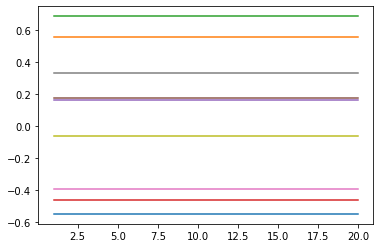

In [39]:
h = network.W3_list[0].shape[0]
w = network.W3_list[0].shape[1]
short = np.zeros((len(network.W3_list), 3, 3))
for idx, w3_list in enumerate(network.W3_list):
    short[idx,:,:] = w3_list[:3,:3]
short = short.reshape(len(network.W3_list),-1)
for i in range(short.shape[1]):
    plt.plot(np.arange(1,short.shape[0] + 1), short[:,i])

In [203]:


print(network.W2_list)

[array([[ 1.20600674e-04,  1.09573658e-03,  1.07553145e-03, ...,
        -4.35060010e-04, -2.06489880e-05,  4.51479549e-04],
       [ 4.21262705e-04,  6.27789852e-04, -1.45985149e-04, ...,
        -1.16805949e-03, -2.59014644e-04,  7.83695155e-04],
       [ 5.30771852e-04, -3.27636603e-04,  2.28240692e-04, ...,
        -7.79966223e-04,  5.94829266e-04,  6.20709790e-04],
       ...,
       [ 7.94674080e-04, -7.95359395e-05, -1.51286533e-03, ...,
        -1.70883341e-03, -3.92546105e-05,  9.36192737e-04],
       [ 8.80676485e-04, -5.49888815e-04,  1.38455673e-04, ...,
        -2.73868381e-04,  9.00597032e-04, -3.48754627e-04],
       [ 5.70051966e-04, -2.95821719e-04,  6.33894037e-04, ...,
        -4.35576257e-04,  5.15412159e-06,  1.12806526e-03]]), array([[ 1.20600674e-04,  1.09573658e-03,  1.07553145e-03, ...,
        -4.35060010e-04, -2.06489880e-05,  4.51479549e-04],
       [ 4.21262705e-04,  6.27789852e-04, -1.45985149e-04, ...,
        -1.16805949e-03, -2.59014644e-04,  7.83695155

# 問題7 学習曲線のプロット

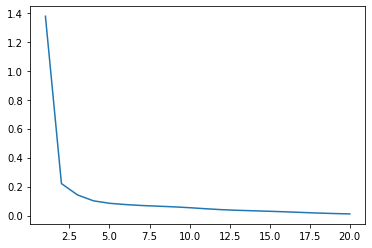

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(np.arange(1,len(network.epoch_loss_list)+1), network.epoch_loss_list)

# 以下完成前の作業

In [65]:
network.epoch_dW1_list

[array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]), array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]), array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]), array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]), array([

In [242]:
network.accuracy(X_train,y_train)

y_pred: [1 1 6 ... 7 7 4]
y: [1 1 6 ... 7 7 4]
47739


99.45625

In [ ]:
network.epoch_loss_list

In [ ]:
test_list = []
for i in range(5):
    test_list.append(network.b1_list[i][0])
print(test_list)

In [192]:
from keras import Sequential
from keras.layers.core import Dense, Activation
from keras import optimizers
model = Sequential()
model.add(Dense(400,input_dim=784, activation='sigmoid',
               kernel_initializer='glorot_uniform'))

model.add(Dense(200,activation='sigmoid',
               kernel_initializer='glorot_uniform'))
model.add(Dense(10,activation='softmax',
               kernel_initializer='glorot_uniform'))

sgd = keras.optimizers.SGD(lr=0.001)
model.compile(optimizer=sgd,
             loss='categorical_crossentropy',
             metrics=['accuracy'])

history = model.fit(X_train[:10000,:], y_train[:10000], epochs=10,batch_size=20,
                   verbose=1,validation_data = (X_train[:10000,:],y_train[:10000]))
score = model.evaluate(X_train[:10000,:],y_train[:10000,:],verbose=0)




Train on 10000 samples, validate on 10000 samples
Epoch 1/10
10000/10000 [==============================] - 3s 254us/step - loss: 2.3304 - accuracy: 0.0985 - val_loss: 2.2974 - val_accuracy: 0.1037
Epoch 2/10
10000/10000 [==============================] - 2s 241us/step - loss: 2.2940 - accuracy: 0.1133 - val_loss: 2.2891 - val_accuracy: 0.1151
Epoch 3/10
10000/10000 [==============================] - 2s 243us/step - loss: 2.2862 - accuracy: 0.1187 - val_loss: 2.2814 - val_accuracy: 0.1361
Epoch 4/10
10000/10000 [==============================] - 2s 240us/step - loss: 2.2783 - accuracy: 0.1445 - val_loss: 2.2738 - val_accuracy: 0.1546
Epoch 5/10
10000/10000 [==============================] - 2s 243us/step - loss: 2.2708 - accuracy: 0.1624 - val_loss: 2.2657 - val_accuracy: 0.1266
Epoch 6/10
10000/10000 [==============================] - 3s 264us/step - loss: 2.2627 - accuracy: 0.1845 - val_loss: 2.2581 - val_accuracy: 0.1666
Epoch 7/10
10000/10000 [==============================] - 3s 2

# 以下の実行で初期化

In [237]:
import numpy as np
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(-1,784)
X_test = X_test.reshape(-1,784)

X_train = X_train.astype(np.float)
X_test = X_test.astype(np.float)
X_train /= 255
X_test /= 255
print(X_train.max())
print(X_train.min())
print(X_train.shape)
print(y_train.shape)


1.0
0.0
(60000, 784)
(60000,)


In [239]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train_one_hot,
                                                 test_size=0.2)



# ここまで

In [7]:
class GetMiniBatch:
    def __init__(self, X, y, batch_size=20, seed=0):
        self.batch_size = batch_size
        np.random.seed(seed)
        shuffle_index = np.random.permutation(np.arange(X.shape[0]))
        self._X = X[shuffle_index]
        self._y = y[shuffle_index]
        self._stop = np.ceil(X.shape[0] / self.batch_size).astype(np.int)
        #self.stopは作成するバッチサイズ数。１エポック分作成する
        
        
    def __len__(self):
        return self._stop
    
    #指定したバッチ番号を取ってきてくれる
    def __getitem__(self, item):
        p0 = item * self.batch_size
        p1 = item*self.batch_size + self.batch_size
        return self._X[p0 : p1], self._y[p0 : p1]

    
    
    #batchカウンターを初期化する
    def __iter__(self):
        self._counter = 0
        return self
    
    #batchを前から一つずつ取ってくる
    def __next__(self):
        if self._counter >= self._stop:
            raise StopIteration()
        p0 = self._counter * self.batch_size
        p1 = self._counter * self.batch_size + self.batch_size
        self._counter += 1
        return self._X[p0 : p1], self._y[p0 : p1]
    
    
    
    

In [ ]:
 get_mini_batch = GetMiniBatch(X_train, y_train, batch_size=20)

print(len(get_mini_batch))

In [ ]:
#for mini_X_train, mini_y_train in get_mini_batch:
    #print(mini_X_train.shape)

# 問題1 重みの初期値を決めるコードの作成

In [ ]:
batch_size = 20
n_features = 784
n_nodes1 = 400
n_nodes2 = 200
n_output = 10
sigma = 0.01
W1 = sigma * np.random.randn(n_features, n_nodes1)
b1 = np.random.randn(n_nodes1,)
W2 = sigma * np.random.randn(n_nodes1, n_nodes2)
b2 = np.random.randn(n_nodes2,)
W3 = sigma * np.random.randn(n_nodes2, n_output)
b3 = np.random.randn(n_output,)

# 問題2 フォワードプロパゲーション

In [ ]:
def Sigmoid(y):
    z = 1 / (1 + np.exp(-y))
    return z
        

In [ ]:
def Softmax(a,):
    a_exp = np.exp(a)
    a_sum = np.sum(a_exp)
    z = a_exp / a_sum
    return z
    

In [ ]:
def FeedForward(X):
    
    a1 = np.dot(X, W1) + b1
    #print(a1[0],'a1')
    z1 = Sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    #print(a2,'a2')
    z2 = Sigmoid(a2)
    #print(z2,'z2')
    a3 = np.dot(z2, W3) + b3
    #print(a3, 'a3')
    z3 = Softmax(a3)
    #print(z3,'z3')
    #print('z3のタイプ', type(z3))
    return a1, z1, a2, z2, a3, z3

In [ ]:
X_mini, y_mini = get_mini_batch[0]

a1, z1, a2, z2, a3,z3 = FeedForward(X_mini)
print(z3.shape)

In [ ]:
print(z3[:5,:])

In [ ]:
print(np.log(z3)[:5,:])

# 問題3 交差エントロピー誤差の実装

In [ ]:
def crossentropy(X,t):
        
    a1, z1, a2, z2, a3, z3 = FeedForward(X)#y_pred(N,10), t(N,10)=(N,10)
    print(np.sum(z3 < 0), 'マイナスのz3がないかチェック')

    print(type(z3),'z3のタイプ')
    print(type(t),'tのタイプ')
    #print(z3,'z3')
    print(np.log(z3 + 1e-20).shape,'logz3の形')
    print(t.shape)
    L = -np.sum(t * np.log(z3 + 1e-50))
    return L
    

In [ ]:
#y_mini_array = np.squeeze(np.asarray(y_mini))

In [ ]:
L = crossentropy(X_mini,y_mini)

In [ ]:
print(L)

In [ ]:
plt.plot(np.arange(1,len(network.loss_list)+1, network.loss_list))

In [ ]:
loss = 0
network = ScratchSimpleNeuralNetrowkClassifier()
for mini_X_train, mini_y_train in get_mini_batch:
    loss += network.loss(mini_X_train,mini_y_train)
mean_loss = loss / len(get_mini_batch)

In [ ]:
mean_loss


# 問題4 バックプロパゲーションの実装

In [ ]:
def backprop_from_SoftmaxWithLoss(t, y, dout=1):
    return y - t


In [ ]:
def backprop_Mutmul_layer(X,W, b, dout):
    #print('doutの形状', dout.shape)
    #print('Xの形状',X.shape)
    dX = np.dot(dout, W.T)
    dW = np.dot(X.T, dout)
    db = np.sum(dout, axis=0)
    #print('dWの形状', dW.shape)
    #print('dXの形状', dX.shape)
    #print('dbの形状', db.shape)
    return dX, dW,db

In [ ]:
def backprop_Sigmoid_layer(dout):
    return dout * (1 - dout)

In [ ]:
#あえてクラスを作成せずにやってみる
#backward
lr = 0.001
loss_list = []
batch_size = 20
n_features = 784
n_nodes1 = 400
n_nodes2 = 200
n_output = 10
sigma = 0.01
W1 = sigma * np.random.randn(n_features, n_nodes1)
b1 = np.random.randn(n_nodes1,)
W2 = sigma * np.random.randn(n_nodes1, n_nodes2)
b2 = np.random.randn(n_nodes2,)
W3 = sigma * np.random.randn(n_nodes2, n_output)
b3 = np.random.randn(n_output,)


for mini_X_train, mini_y_train in get_mini_batch:
    #print(mini_X_train[0])
    print(W1.shape)
    print(type(mini_X_train),'mini_X_trainのタイプ')
    a1,z1, a2, z2, a3, z3 = FeedForward(mini_X_train)
    
    
    #print(z3,'z3の値')
    da3 = backprop_from_SoftmaxWithLoss(mini_y_train, z3)
    dz2,dW3,db3 = backprop_Mutmul_layer(z2, W3, b3, da3)
    da2 = backprop_Sigmoid_layer(dz2)
    dz1,dW2,db2 = backprop_Mutmul_layer(z1, W2, b2, da2)
    da1 = backprop_Sigmoid_layer(dz1)
    dX, dW1, db1= backprop_Mutmul_layer(mini_X_train, W1, b1, da1)

        #勾配の更新
    W1 -= lr * dW1
    b1 -= lr * db1
    W2 -= lr * dW2
    b2 -= lr * db2
    W3 -= lr * dW3
    b3 -= lr * db3
    
    #lossを求める
    loss = crossentropy(mini_X_train,mini_y_train)
    #print(loss)
    loss_list.append(loss)
    
    
    
    

In [ ]:
print(W1.shape)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(np.arange(1,len(loss_list) + 1), loss_list)

In [ ]:
print(loss_list[-5:])

In [ ]:
print(W1)

In [ ]:
test_array = np.array([[8,8,9],
                       [9,1,2]])
print(np.argmax(test_array,axis=1))

In [176]:
# coding: utf-8
import numpy as np


def identity_function(x):
    return x


def step_function(x):
    return np.array(x > 0, dtype=np.int)


def sigmoid(x):
    return 1 / (1 + np.exp(-x))    


def sigmoid_grad(x):
    return (1.0 - sigmoid(x)) * sigmoid(x)
    

def relu(x):
    return np.maximum(0, x)


def relu_grad(x):
    grad = np.zeros(x)
    grad[x>=0] = 1
    return grad
    

def softmax(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T 

    x = x - np.max(x) # オーバーフロー対策
    return np.exp(x) / np.sum(np.exp(x))


def mean_squared_error(y, t):
    return 0.5 * np.sum((y-t)**2)


def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    # 教師データがone-hot-vectorの場合、正解ラベルのインデックスに変換
    if t.size == y.size:
        t = t.argmax(axis=1)
             
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size


def softmax_loss(X, t):
    y = softmax(X)
    return cross_entropy_error(y, t)











#coding: utf-8
import numpy as np

#from common.util import im2col, col2im


class Relu:
    def __init__(self):
        self.mask = None

    def forward(self, x):
        self.mask = (x <= 0)
        out = x.copy()
        out[self.mask] = 0

        return out

    def backward(self, dout):
        dout[self.mask] = 0
        dx = dout

        return dx


class Sigmoid:
    def __init__(self):
        self.out = None

    def forward(self, x):
        out = sigmoid(x)
        self.out = out
        return out

    def backward(self, dout):
        dx = dout * (1.0 - self.out) * self.out

        return dx


class Affine:
    def __init__(self, W, b):
        self.W =W
        self.b = b
        
        self.x = None
        self.original_x_shape = None
        # 重み・バイアスパラメータの微分
        self.dW = None
        self.db = None

    def forward(self, x):
        # テンソル対応
        self.original_x_shape = x.shape
        x = x.reshape(x.shape[0], -1)
        self.x = x

        out = np.dot(self.x, self.W) + self.b

        return out

    def backward(self, dout):
        dx = np.dot(dout, self.W.T)
        self.dW = np.dot(self.x.T, dout)
        self.db = np.sum(dout, axis=0)
        
        dx = dx.reshape(*self.original_x_shape)  # 入力データの形状に戻す（テンソル対応）
        return dx


class SoftmaxWithLoss:
    def __init__(self):
        self.loss = None
        self.y = None # softmaxの出力
        self.t = None # 教師データ

    def forward(self, x, t):
        self.t = t
        self.y = softmax(x)
        self.loss = cross_entropy_error(self.y, self.t)
        
        return self.loss

    def backward(self, dout=1):
        batch_size = self.t.shape[0]
        if self.t.size == self.y.size: # 教師データがone-hot-vectorの場合
            dx = (self.y - self.t) / batch_size
        else:
            dx = self.y.copy()
            dx[np.arange(batch_size), self.t] -= 1
            dx = dx / batch_size
        
        return dx


class Dropout:
    """
    http://arxiv.org/abs/1207.0580
    """
    def __init__(self, dropout_ratio=0.5):
        self.dropout_ratio = dropout_ratio
        self.mask = None

    def forward(self, x, train_flg=True):
        if train_flg:
            self.mask = np.random.rand(*x.shape) > self.dropout_ratio
            return x * self.mask
        else:
            return x * (1.0 - self.dropout_ratio)

    def backward(self, dout):
        return dout * self.mask


class BatchNormalization:
    """
    http://arxiv.org/abs/1502.03167
    """
    def __init__(self, gamma, beta, momentum=0.9, running_mean=None, running_var=None):
        self.gamma = gamma
        self.beta = beta
        self.momentum = momentum
        self.input_shape = None # Conv層の場合は4次元、全結合層の場合は2次元  

        # テスト時に使用する平均と分散
        self.running_mean = running_mean
        self.running_var = running_var  
        
        # backward時に使用する中間データ
        self.batch_size = None
        self.xc = None
        self.std = None
        self.dgamma = None
        self.dbeta = None

    def forward(self, x, train_flg=True):
        self.input_shape = x.shape
        if x.ndim != 2:
            N, C, H, W = x.shape
            x = x.reshape(N, -1)

        out = self.__forward(x, train_flg)
        
        return out.reshape(*self.input_shape)
            
    def __forward(self, x, train_flg):
        if self.running_mean is None:
            N, D = x.shape
            self.running_mean = np.zeros(D)
            self.running_var = np.zeros(D)
                        
        if train_flg:
            mu = x.mean(axis=0)
            xc = x - mu
            var = np.mean(xc**2, axis=0)
            std = np.sqrt(var + 10e-7)
            xn = xc / std
            
            self.batch_size = x.shape[0]
            self.xc = xc
            self.xn = xn
            self.std = std
            self.running_mean = self.momentum * self.running_mean + (1-self.momentum) * mu
            self.running_var = self.momentum * self.running_var + (1-self.momentum) * var            
        else:
            xc = x - self.running_mean
            xn = xc / ((np.sqrt(self.running_var + 10e-7)))
            
        out = self.gamma * xn + self.beta 
        return out

    def backward(self, dout):
        if dout.ndim != 2:
            N, C, H, W = dout.shape
            dout = dout.reshape(N, -1)

        dx = self.__backward(dout)

        dx = dx.reshape(*self.input_shape)
        return dx

    def __backward(self, dout):
        dbeta = dout.sum(axis=0)
        dgamma = np.sum(self.xn * dout, axis=0)
        dxn = self.gamma * dout
        dxc = dxn / self.std
        dstd = -np.sum((dxn * self.xc) / (self.std * self.std), axis=0)
        dvar = 0.5 * dstd / self.std
        dxc += (2.0 / self.batch_size) * self.xc * dvar
        dmu = np.sum(dxc, axis=0)
        dx = dxc - dmu / self.batch_size
        
        self.dgamma = dgamma
        self.dbeta = dbeta
        
        return dx


class Convolution:
    def __init__(self, W, b, stride=1, pad=0):
        self.W = W
        self.b = b
        self.stride = stride
        self.pad = pad
        
        # 中間データ（backward時に使用）
        self.x = None   
        self.col = None
        self.col_W = None
        
        # 重み・バイアスパラメータの勾配
        self.dW = None
        self.db = None

    def forward(self, x):
        FN, C, FH, FW = self.W.shape
        N, C, H, W = x.shape
        out_h = 1 + int((H + 2*self.pad - FH) / self.stride)
        out_w = 1 + int((W + 2*self.pad - FW) / self.stride)

        col = im2col(x, FH, FW, self.stride, self.pad)
        col_W = self.W.reshape(FN, -1).T

        out = np.dot(col, col_W) + self.b
        out = out.reshape(N, out_h, out_w, -1).transpose(0, 3, 1, 2)

        self.x = x
        self.col = col
        self.col_W = col_W

        return out

    def backward(self, dout):
        FN, C, FH, FW = self.W.shape
        dout = dout.transpose(0,2,3,1).reshape(-1, FN)

        self.db = np.sum(dout, axis=0)
        self.dW = np.dot(self.col.T, dout)
        self.dW = self.dW.transpose(1, 0).reshape(FN, C, FH, FW)

        dcol = np.dot(dout, self.col_W.T)
        dx = col2im(dcol, self.x.shape, FH, FW, self.stride, self.pad)

        return dx


class Pooling:
    def __init__(self, pool_h, pool_w, stride=1, pad=0):
        self.pool_h = pool_h
        self.pool_w = pool_w
        self.stride = stride
        self.pad = pad
        
        self.x = None
        self.arg_max = None

    def forward(self, x):
        N, C, H, W = x.shape
        out_h = int(1 + (H - self.pool_h) / self.stride)
        out_w = int(1 + (W - self.pool_w) / self.stride)

        col = im2col(x, self.pool_h, self.pool_w, self.stride, self.pad)
        col = col.reshape(-1, self.pool_h*self.pool_w)

        arg_max = np.argmax(col, axis=1)
        out = np.max(col, axis=1)
        out = out.reshape(N, out_h, out_w, C).transpose(0, 3, 1, 2)

        self.x = x
        self.arg_max = arg_max

        return out

    def backward(self, dout):
        dout = dout.transpose(0, 2, 3, 1)
        
        pool_size = self.pool_h * self.pool_w
        dmax = np.zeros((dout.size, pool_size))
        dmax[np.arange(self.arg_max.size), self.arg_max.flatten()] = dout.flatten()
        dmax = dmax.reshape(dout.shape + (pool_size,)) 
        
        dcol = dmax.reshape(dmax.shape[0] * dmax.shape[1] * dmax.shape[2], -1)
        dx = col2im(dcol, self.x.shape, self.pool_h, self.pool_w, self.stride, self.pad)
        
        return dx

In [178]:
import numpy as np
from collections import OrderedDict



class TestLayerNet:
    """全結合による多層ニューラルネットワーク

    Parameters
    ----------
    input_size : 入力サイズ（MNISTの場合は784）
    hidden_size_list : 隠れ層のニューロンの数のリスト（e.g. [100, 100, 100]）
    output_size : 出力サイズ（MNISTの場合は10）
    activation : 'relu' or 'sigmoid'
    weight_init_std : 重みの標準偏差を指定（e.g. 0.01）
        'relu'または'he'を指定した場合は「Heの初期値」を設定
        'sigmoid'または'xavier'を指定した場合は「Xavierの初期値」を設定
    weight_decay_lambda : Weight Decay（L2ノルム）の強さ
    """
    def __init__(self, input_size, hidden_size_list, output_size,
                 activation='relu', weight_init_std='relu', weight_decay_lambda=0):
        self.input_size = input_size
        self.output_size = output_size
        self.hidden_size_list = hidden_size_list
        self.hidden_layer_num = len(hidden_size_list)
        self.weight_decay_lambda = weight_decay_lambda
        self.params = {}

        # 重みの初期化
        self.__init_weight(weight_init_std)

        # レイヤの生成
        activation_layer = {'sigmoid': Sigmoid, 'relu': Relu}
        self.layers = OrderedDict()
        for idx in range(1, self.hidden_layer_num+1):
            self.layers['Affine' + str(idx)] = Affine(self.params['W' + str(idx)],
                                                      self.params['b' + str(idx)])
            self.layers['Activation_function' + str(idx)] = activation_layer[activation]()

        idx = self.hidden_layer_num + 1
        self.layers['Affine' + str(idx)] = Affine(self.params['W' + str(idx)],
            self.params['b' + str(idx)])

        self.last_layer = SoftmaxWithLoss()

    def __init_weight(self, weight_init_std):
        """重みの初期値設定

        Parameters
        ----------
        weight_init_std : 重みの標準偏差を指定（e.g. 0.01）
            'relu'または'he'を指定した場合は「Heの初期値」を設定
            'sigmoid'または'xavier'を指定した場合は「Xavierの初期値」を設定
        """
        all_size_list = [self.input_size] + self.hidden_size_list + [self.output_size]
        for idx in range(1, len(all_size_list)):
            scale = weight_init_std
            if str(weight_init_std).lower() in ('relu', 'he'):
                scale = np.sqrt(2.0 / all_size_list[idx - 1])  # ReLUを使う場合に推奨される初期値
            elif str(weight_init_std).lower() in ('sigmoid', 'xavier'):
                scale = np.sqrt(1.0 / all_size_list[idx - 1])  # sigmoidを使う場合に推奨される初期値

            self.params['W' + str(idx)] = scale * np.random.randn(all_size_list[idx-1], all_size_list[idx])
            self.params['b' + str(idx)] = np.zeros(all_size_list[idx])

    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)

        return x

    def loss(self, x, t):
        """損失関数を求める

        Parameters
        ----------
        x : 入力データ
        t : 教師ラベル

        Returns
        -------
        損失関数の値
        """
        y = self.predict(x)

        weight_decay = 0
        for idx in range(1, self.hidden_layer_num + 2):
            W = self.params['W' + str(idx)]
            weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W ** 2)

        return self.last_layer.forward(y, t) + weight_decay

    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        if t.ndim != 1 : t = np.argmax(t, axis=1)

        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy

#     def numerical_gradient(self, x, t):
#         """勾配を求める（数値微分）

#         Parameters
#         ----------
#         x : 入力データ
#         t : 教師ラベル

#         Returns
#         -------
#         各層の勾配を持ったディクショナリ変数
#             grads['W1']、grads['W2']、...は各層の重み
#             grads['b1']、grads['b2']、...は各層のバイアス
#         """
#         loss_W = lambda W: self.loss(x, t)

#         grads = {}
#         for idx in range(1, self.hidden_layer_num+2):
#             grads['W' + str(idx)] = numerical_gradient(loss_W, self.params['W' + str(idx)])
#             grads['b' + str(idx)] = numerical_gradient(loss_W, self.params['b' + str(idx)])

#         return grads

    def gradient(self, x, t):
        """勾配を求める（誤差逆伝搬法）

        Parameters
        ----------
        x : 入力データ
        t : 教師ラベル

        Returns
        -------
        各層の勾配を持ったディクショナリ変数
            grads['W1']、grads['W2']、...は各層の重み
            grads['b1']、grads['b2']、...は各層のバイアス
        """
        # forward
        self.loss(x, t)

        # backward
        dout = 1
        dout = self.last_layer.backward(dout)

        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)

        # 設定
        grads = {}
        for idx in range(1, self.hidden_layer_num+2):
            grads['W' + str(idx)] = self.layers['Affine' + str(idx)].dW + self.weight_decay_lambda * self.layers['Affine' + str(idx)].W
            grads['b' + str(idx)] = self.layers['Affine' + str(idx)].db

        return grads


In [179]:
import numpy as np

class SGD:

    """確率的勾配降下法（Stochastic Gradient Descent）"""

    def __init__(self, lr=0.01):
        self.lr = lr
        
    def update(self, params, grads):
        for key in params.keys():
            params[key] -= self.lr * grads[key] 

In [180]:
import keras 

シグモイドの微分値を調べれば勾配が消失しているか確認できる